In [1]:
# data
text = "Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance."
text

'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.'

In [2]:
sentences = text.split(".")
sentences = [s.strip() for s in sentences if s]
sentences

['Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning',
 'Learning can be supervised, semi-supervised or unsupervised',
 'Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance']

In [3]:
new_sentences = []
for s in sentences:
    words = s.split(" ")
    new_sentence = ""
    for i, w in enumerate(words):
        new_sentence += w + " "
        if i % 10 == 0 and i != 0:
            new_sentences.append(new_sentence.strip())
            new_sentence = ""
    new_sentences.append(new_sentence.strip())

new_sentences

['Deep learning (also known as deep structured learning) is part of',
 'a broader family of machine learning methods based on artificial',
 'neural networks with representation learning',
 'Learning can be supervised, semi-supervised or unsupervised',
 'Deep-learning architectures such as deep neural networks, deep belief networks, deep',
 'reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers',
 'have been applied to fields including computer vision, speech recognition,',
 'natural language processing, machine translation, bioinformatics, drug design, medical image',
 'analysis, climate science, material inspection and board game programs, where',
 'they have produced results comparable to and in some cases',
 'surpassing human expert performance']

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_sentences)
tokenizer.word_index["<PAD>"] = 0

In [5]:
word_to_index = tokenizer.word_index
index_to_word = {i: w for w, i in word_to_index.items()}

print(word_to_index)
print(index_to_word)

{'learning': 1, 'deep': 2, 'networks': 3, 'neural': 4, 'and': 5, 'as': 6, 'of': 7, 'machine': 8, 'supervised': 9, 'have': 10, 'to': 11, 'also': 12, 'known': 13, 'structured': 14, 'is': 15, 'part': 16, 'a': 17, 'broader': 18, 'family': 19, 'methods': 20, 'based': 21, 'on': 22, 'artificial': 23, 'with': 24, 'representation': 25, 'can': 26, 'be': 27, 'semi': 28, 'or': 29, 'unsupervised': 30, 'architectures': 31, 'such': 32, 'belief': 33, 'reinforcement': 34, 'recurrent': 35, 'convolutional': 36, 'transformers': 37, 'been': 38, 'applied': 39, 'fields': 40, 'including': 41, 'computer': 42, 'vision': 43, 'speech': 44, 'recognition': 45, 'natural': 46, 'language': 47, 'processing': 48, 'translation': 49, 'bioinformatics': 50, 'drug': 51, 'design': 52, 'medical': 53, 'image': 54, 'analysis': 55, 'climate': 56, 'science': 57, 'material': 58, 'inspection': 59, 'board': 60, 'game': 61, 'programs': 62, 'where': 63, 'they': 64, 'produced': 65, 'results': 66, 'comparable': 67, 'in': 68, 'some': 69, 

In [6]:
word_sequences = tokenizer.texts_to_sequences(new_sentences)
word_sequences

[[2, 1, 12, 13, 6, 2, 14, 1, 15, 16, 7],
 [17, 18, 19, 7, 8, 1, 20, 21, 22, 23],
 [4, 3, 24, 25, 1],
 [1, 26, 27, 9, 28, 9, 29, 30],
 [2, 1, 31, 32, 6, 2, 4, 3, 2, 33, 3, 2],
 [34, 1, 35, 4, 3, 36, 4, 3, 5, 37],
 [10, 38, 39, 11, 40, 41, 42, 43, 44, 45],
 [46, 47, 48, 8, 49, 50, 51, 52, 53, 54],
 [55, 56, 57, 58, 59, 5, 60, 61, 62, 63],
 [64, 10, 65, 66, 67, 11, 5, 68, 69, 70],
 [71, 72, 73, 74]]

In [7]:
vocab_size = len(word_to_index)
embedding_dim = 100
window_size = 2

In [8]:
# Create training data
import numpy as np

x_train = []
y_train = []

for s in word_sequences:
    for i in range(window_size, len(s) - window_size):
        x_train.append(s[i - window_size:i] + s[i + 1:i + window_size + 1])
        y_train.append(s[i])

x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape)
print(y_train.shape)

(56, 4)
(56,)


In [9]:
print(x_train)
print(y_train)

[[ 2  1 13  6]
 [ 1 12  6  2]
 [12 13  2 14]
 [13  6 14  1]
 [ 6  2  1 15]
 [ 2 14 15 16]
 [14  1 16  7]
 [17 18  7  8]
 [18 19  8  1]
 [19  7  1 20]
 [ 7  8 20 21]
 [ 8  1 21 22]
 [ 1 20 22 23]
 [ 4  3 25  1]
 [ 1 26  9 28]
 [26 27 28  9]
 [27  9  9 29]
 [ 9 28 29 30]
 [ 2  1 32  6]
 [ 1 31  6  2]
 [31 32  2  4]
 [32  6  4  3]
 [ 6  2  3  2]
 [ 2  4  2 33]
 [ 4  3 33  3]
 [ 3  2  3  2]
 [34  1  4  3]
 [ 1 35  3 36]
 [35  4 36  4]
 [ 4  3  4  3]
 [ 3 36  3  5]
 [36  4  5 37]
 [10 38 11 40]
 [38 39 40 41]
 [39 11 41 42]
 [11 40 42 43]
 [40 41 43 44]
 [41 42 44 45]
 [46 47  8 49]
 [47 48 49 50]
 [48  8 50 51]
 [ 8 49 51 52]
 [49 50 52 53]
 [50 51 53 54]
 [55 56 58 59]
 [56 57 59  5]
 [57 58  5 60]
 [58 59 60 61]
 [59  5 61 62]
 [ 5 60 62 63]
 [64 10 66 67]
 [10 65 67 11]
 [65 66 11  5]
 [66 67  5 68]
 [67 11 68 69]
 [11  5 69 70]]
[12 13  6  2 14  1 15 19  7  8  1 20 21 24 27  9 28  9 31 32  6  2  4  3
  2 33 35  4  3 36  4  3 39 11 40 41 42 43 48  8 49 50 51 52 57 58 59  5
 60 61 65 66 

In [10]:
# Create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=window_size * 2),
    tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(vocab_size, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
# Train model
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 4.3191  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1696 - loss: 4.3058  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3065 - loss: 4.2950  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3765 - loss: 4.2837  
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4196 - loss: 4.2694  
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4405 - loss: 4.2520  
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4182 - loss: 4.2336  
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3646 - loss: 4.2130  
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3958 - loss: 4.1829  
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2753 - loss: 4.1561
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3185 - loss: 4.1152  
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

<Axes: >

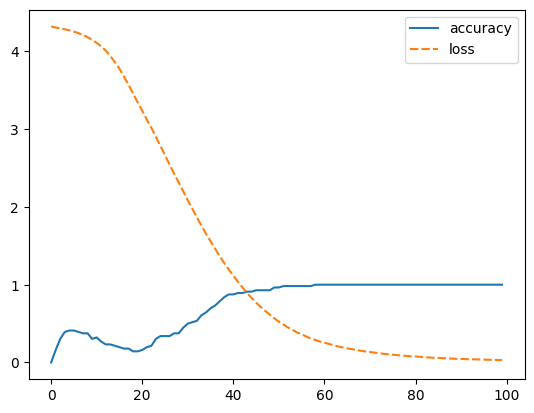

In [12]:
import seaborn as sns
sns.lineplot(model.history.history)

In [13]:
# Prediction model
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

embeddings = model.get_weights()[0]
embeddings_pca = pca.fit_transform(embeddings)

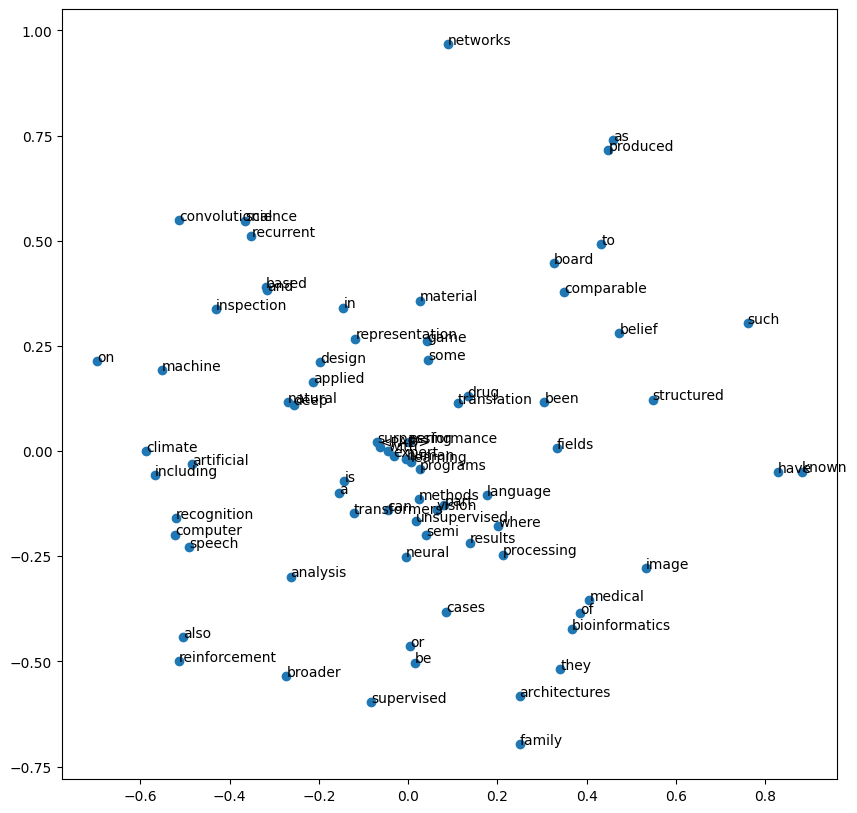

In [14]:
# Plot embeddings
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])

for i in range(vocab_size):
    plt.text(embeddings_pca[i, 0], embeddings_pca[i, 1], index_to_word[i])

plt.show()

In [15]:
test_sentenses = [
    "known as structured learning",
    "transformers have applied to",
    "where they produced results",
    "cases surpassing expert performance"
]

for s in test_sentenses:
    words = s.split(" ")
    word_sequence = tokenizer.texts_to_sequences([words])[0]

    predictions = model.predict(np.array([word_sequence]))
    predicted_index = tf.argmax(predictions[0])

    print(s, "->", index_to_word.get(predicted_index.numpy()), "\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
known as structured learning -> deep 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
transformers have applied to -> applied 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
where they produced results -> produced 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
cases surpassing expert performance -> in 

